In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import matrix_rank
import datetime
import math

## Read data frames

In [4]:
path_to_preprocessed = 'Data/Schöpfleuthnergasse/Preprocessed data/' #write path to the you own folder

### This is preprocessed Kostenstelen file

In [5]:
KST_df = pd.read_csv(path_to_preprocessed + 'KST.csv')
KST_df.head(6)

,konto,text,belegnummer,kr_db,betrag,menge,me,date
0,11100,LÖHNE,0003LL,NaN,6554.26,0.0,NaN,2021-03-01
1,11100,LÖHNE,0003LL,NaN,335.91,0.0,NaN,2021-03-01
2,11100,LÖHNE,0004LL,NaN,11007.66,0.0,NaN,2021-04-01
3,11100,LÖHNE,0004LL,NaN,638.18,0.0,NaN,2021-04-01
4,11100,LÖHNE,0005LL,NaN,12048.99,0.0,NaN,2021-05-01
5,11100,LÖHNE,0005LL,NaN,715.36,0.0,NaN,2021-05-01


In [6]:
KST_df \
    .groupby('date') \
        .agg({'menge':'sum'})

,menge
date,
2020-09-01,989.87
2020-10-01,1815.05
2020-11-01,959.86
2020-12-01,947.56
2021-01-01,1375.12
2021-02-01,3471.60
2021-03-01,5032.16
2021-04-01,8697.92
2021-05-01,12945.90


### This is preprocessed AT Rechnungsübersicht file

In [7]:
AT_rech_df = pd.read_csv(path_to_preprocessed + 'AT_rech.csv')
AT_rech_df.head(6)

,belegdatum,belegnummer,nettobetrag,kreditor,kr_db,konto,barcode
0,2020-06-30,20200523.,10000.00,NAGL ELEKTRO GMBH,2071024,58300,ATKAAOJA
1,2020-09-29,707,1982.22,PORRANZL FRITZ,103441,51200,ATR14WRA
2,2020-09-29,705.,582.28,PORRANZL FRITZ,103441,51200,ATR14WR8
3,2020-10-05,716,2255.80,PORRANZL FRITZ,103441,51200,ATR15A7T
4,2020-07-16,20200566,5000.00,NAGL ELEKTRO GMBH,2071024,58300,ATP036CQ
5,2020-11-02,810,853.68,PORRANZL FRITZ,103441,51200,ATR15QG2


### This is preprocessed Aufmasblatt file

In [8]:
AMBL_df = pd.read_csv(path_to_preprocessed + 'AMBL.csv')
AMBL_df.head(3)

,kurztext,ergebnis,me,le,le_datum,bz,comment,factor,blatt,zeile,revitid,dt
0,Mulden,1042.0,VE,1,2021-03-01,1,NaN,NaN,1.0,100.0,0,2021-03-01
1,Mulden,408.0,VE,1,2021-04-01,2,NaN,NaN,1.0,1700.0,0,2021-04-01
2,Mulden,1121.0,VE,1,2021-05-01,3,NaN,NaN,1.0,2900.0,0,2021-05-01


In [9]:
print('Number of rows in AMBL file is ' + str(AMBL_df.shape[0]))

Number of rows in AMBL file is 35344


### This is preprocessed export file of BIM model

In [10]:
BIM_model_df = pd.read_csv(path_to_preprocessed + 'BIMmodel.csv')
BIM_model_df.head(3)

,name,class,objectid,elementid,5d Bauteil,5d Geschoss,5d Los,Volumen,Fläche,Breite,Dicke,Länge,cpiComponentType,Material
0,"5dsf-IW-Freist. Vorsatzschale CW75 1GKPl. 12,5...",5D-AB-IW-MSTW-VS,00140115-8783-41e8-99e6-7a372dcf523d-00340f03,3411715,NaN,OG05,W05,0.771,8.817,0.088,NaN,3.426,Wall,5dsf-IW-CW-VS
1,"5dsf-IW-ESTW-CW75/100mm 42dB 2GKPl. 12,5mm - IW07",5D-AB-IW-MSTW,00140115-8783-41e8-99e6-7a372dcf523d-00340f04,3411716,NaN,OG05,W05,0.240,2.399,0.100,NaN,0.882,Wall,5dsf-IW-CW-ESTW
2,5dsf-IW-ESTW-CW75/1125mm 49dB 3xGKPl. IW14,5D-AB-IW-MSTW,00140115-8783-41e8-99e6-7a372dcf523d-00340f05,3411717,NaN,OG05,W05,0.368,3.269,0.113,NaN,1.260,Wall,NaN


In [11]:
print('Number of rows in BIM model file is ' + str(BIM_model_df.shape[0]))

Number of rows in BIM model file is 7426


### Check some indicators in KST

In [12]:
betrag_per_month = KST_df \
                        .groupby('date') \
                        .agg({'betrag':'sum'})

<Axes: xlabel='date'>

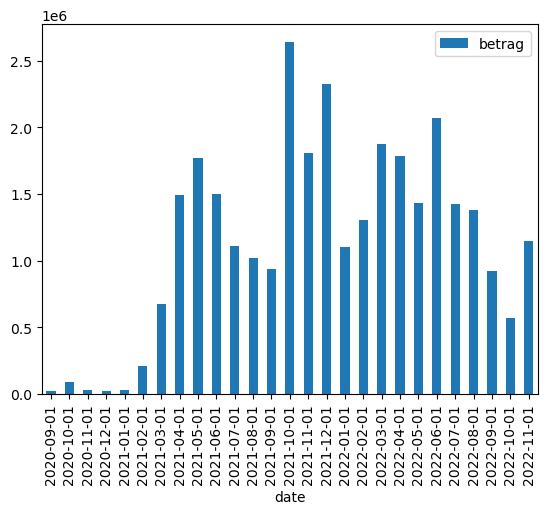

In [13]:
betrag_per_month.plot.bar()

### Check some indicators in AMBL

In [14]:
AMBL_df_no_empty_revitid = AMBL_df.loc[AMBL_df.revitid != 0]
AMBL_df_no_empty_revitid.head(3)

,kurztext,ergebnis,me,le,le_datum,bz,comment,factor,blatt,zeile,revitid,dt
512,Sauberkeitsschicht C16/20,1.197,m³,1,NaN,2,NaN,NaN,50.0,400.0,3115520,2021-04-01
513,Sauberkeitsschicht C16/20,0.003,m³,1,NaN,2,NaN,NaN,50.0,450.0,3115520,2021-04-01
514,Sauberkeitsschicht C16/20,0.311,m³,1,NaN,2,NaN,NaN,50.0,650.0,3084339,2021-04-01


In [15]:
AMBL_df_no_empty_revitid.describe()

,ergebnis,le,bz,comment,blatt,zeile,revitid
count,32993.000000,32993.0,32993.000000,0.0,32993.000000,32993.000000,3.299300e+04
mean,2.459043,1.0,11.493105,NaN,59.444185,66228.835814,3.377854e+06
std,11.024180,0.0,3.865615,NaN,3.770078,48959.673295,2.632325e+05
min,-38.320000,1.0,2.000000,NaN,50.000000,10.000000,2.843648e+06
25%,0.001000,1.0,9.000000,NaN,57.000000,26185.000000,3.194078e+06
50%,0.271000,1.0,12.000000,NaN,60.000000,57150.000000,3.418173e+06
75%,1.711000,1.0,14.000000,NaN,62.000000,95980.000000,3.524875e+06
max,390.702000,1.0,18.000000,NaN,65.000000,205350.000000,3.787666e+06


In [16]:
AMBL_df_no_empty_revitid \
        .groupby('bz', as_index = False) \
                .agg({'revitid':'nunique'}) \
                        .sort_values( by = 'revitid', ascending = True)

,bz,revitid
0,2,86
15,17,104
2,4,170
1,3,189
3,5,250
4,6,374
6,8,434
5,7,451
7,9,514
14,16,689


In [17]:
AMBL_df_no_empty_revitid.loc[AMBL_df_no_empty_revitid.bz == 2].shape

(283, 12)

In [18]:
list_of_revitid = AMBL_df_no_empty_revitid.revitid.unique()


### Check some indicators in BIM

In [19]:
BIM_model_df.shape

(7426, 14)

In [20]:
BIM_model_df.nunique()

name                 252
class                 37
objectid            7426
elementid           7426
5d Bauteil             0
5d Geschoss           10
5d Los                14
Volumen             1510
Fläche              2127
Breite               122
Dicke                 45
Länge               1130
cpiComponentType       9
Material              39
dtype: int64

In [21]:
BIM_model_df \
    .groupby('cpiComponentType') \
        .agg({'class':'nunique'})

,class
cpiComponentType,
Beam,1
Column,1
Default,2
Door,1
Foundation,1
Foundation_Slab,4
Slab,11
Wall,15
Window,1


In [22]:
BIM_model_df.loc[BIM_model_df.cpiComponentType == 'Foundation_Slab']

,name,class,objectid,elementid,5d Bauteil,5d Geschoss,5d Los,Volumen,Fläche,Breite,Dicke,Länge,cpiComponentType,Material
506,5dki Bodenplattenrampe 90cm C25/30,5D-KI-BoPla,06e9f522-29c1-4a07-b1d5-27aa6e7424ec-002f0c15,3084367,NaN,FU,FU02,41.512,48.259,NaN,NaN,NaN,Foundation_Slab,Beton - Stb.Bopla
588,5dki Bodenplatte 68cm C25/30,5D-KI-BoPla,096d2da1-c3f0-4ad1-9373-ebbe85278ef2-002b7ca0,2849952,NaN,FU,FU04,2.354,3.478,13.416,0.680,0.250,Foundation_Slab,Beton - Stb.Bopla
589,"5dki Bodenplatte 79,5cm C25/30",5D-KI-BoPla,096d2da1-c3f0-4ad1-9373-ebbe85278ef2-002b7cc8,2849992,NaN,FU,FU04,2.445,3.076,0.660,0.795,8.158,Foundation_Slab,Beton - Stb.Bopla
590,5dki Bodenplatte 78cm C25/30,5D-KI-BoPla,096d2da1-c3f0-4ad1-9373-ebbe85278ef2-002b7d13,2850067,NaN,FU,FU04,0.455,0.584,2.335,0.780,0.250,Foundation_Slab,Beton - Stb.Bopla
591,"5dki Bodenplatte 80,5cm C25/30",5D-KI-BoPla,096d2da1-c3f0-4ad1-9373-ebbe85278ef2-002b7d60,2850144,NaN,FU,FU01,0.051,1.384,5.038,0.805,0.403,Foundation_Slab,Beton - Stb.Bopla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7078,5dki Bodenplattenrampe 77cm C25/30,5D-KI-BoPla,fb68c4f7-b8a9-4634-98dd-7819c0eebc7c-002b7b0e,2849550,NaN,FU,FU02,0.679,0.928,NaN,NaN,NaN,Foundation_Slab,Beton - Stb.Bopla
7079,5dki Bodenplatte 30cm C25/30,5D-KI-BoPla,fb68c4f7-b8a9-4634-98dd-7819c0eebc7c-002b7b4e,2849614,NaN,FU,FU02,0.486,1.766,1.114,0.300,1.600,Foundation_Slab,Beton - Stb.Bopla
7080,5dki Bodenplatte 77cm C25/30,5D-KI-BoPla,fb68c4f7-b8a9-4634-98dd-7819c0eebc7c-002b7b84,2849668,NaN,FU,FU02,1.002,1.302,0.250,0.770,5.201,Foundation_Slab,Beton - Stb.Bopla
7081,"5dki Bodenplatte 79,5cm C25/30",5D-KI-BoPla,fb68c4f7-b8a9-4634-98dd-7819c0eebc7c-002b7be0,2849760,NaN,FU,FU02,2.676,3.379,12.989,0.795,0.250,Foundation_Slab,Beton - Stb.Bopla


In [23]:
BIM_model_df = BIM_model_df.loc[BIM_model_df.elementid != 0]

In [24]:
BIM_model_df.shape

(7425, 14)

In [25]:
AMBL_to_be_merged = AMBL_df_no_empty_revitid \
    .groupby(['revitid','dt','kurztext','me'], as_index = False) \
        .agg({'ergebnis':'sum'}) \
            .sort_values(by = ['revitid', 'dt'], ascending = True)

In [26]:
AMBL_to_be_merged.shape

(18561, 5)

### Take part of BIM_model to merge with AMBL.

In [27]:
col_to_be_merged = ['name',
                    'class',
                    'elementid',
                    '5d Bauteil',
                    '5d Geschoss',
                    '5d Los',
                    'cpiComponentType',
                    'Volumen',
                    'Fläche',
                    'Breite',
                    'Dicke',
                    'Länge']

In [28]:
BIM_to_be_merged = BIM_model_df[col_to_be_merged].rename(columns = {'elementid':'revitid',
                                                                    '5d Bauteil':'5d_bauteil',
                                                                    '5d Geschoss':'5d_geschoss',
                                                                    '5d Los':'5d_los',
                                                                    'cpiComponentType':'cpi_component_type',
                                                                    'Volumen':'volume',
                                                                    'Fläche':'area',
                                                                    'Breite':'width',
                                                                    'Dicke':'thick',
                                                                    'Länge':'length'})

In [29]:
BIM_to_be_merged.head()

,name,class,revitid,5d_bauteil,5d_geschoss,5d_los,cpi_component_type,volume,area,width,thick,length
0,"5dsf-IW-Freist. Vorsatzschale CW75 1GKPl. 12,5...",5D-AB-IW-MSTW-VS,3411715,NaN,OG05,W05,Wall,0.771,8.817,0.088,NaN,3.426
1,"5dsf-IW-ESTW-CW75/100mm 42dB 2GKPl. 12,5mm - IW07",5D-AB-IW-MSTW,3411716,NaN,OG05,W05,Wall,0.240,2.399,0.100,NaN,0.882
2,5dsf-IW-ESTW-CW75/1125mm 49dB 3xGKPl. IW14,5D-AB-IW-MSTW,3411717,NaN,OG05,W05,Wall,0.368,3.269,0.113,NaN,1.260
3,"5dsf-IW-Vorsatzschale MW50 1GKPl. 12,5mm IW01",5D-AB-IW-MSTW-VS,3411718,NaN,OG05,W05,Wall,0.567,9.073,0.063,NaN,3.507
4,"5dsf-IW-Vorsatzschale MW50 1GKPl. 12,5mm IW01",5D-AB-IW-MSTW-VS,3411719,NaN,OG05,W05,Wall,0.773,12.362,0.063,NaN,4.681


In [30]:
BIM_to_be_merged.nunique()

name                   251
class                   37
revitid               7425
5d_bauteil               0
5d_geschoss             10
5d_los                  14
cpi_component_type       9
volume                1510
area                  2127
width                  122
thick                   45
length                1130
dtype: int64

In [31]:
AMBL_to_be_merged.shape

(18561, 5)

In [32]:
merged_df = AMBL_to_be_merged.merge(BIM_to_be_merged, how='inner', on='revitid')

In [33]:
merged_df.shape

(14628, 16)

In [34]:
merged_df.nunique()

revitid               5129
dt                      16
kurztext                60
me                       4
ergebnis              3705
name                   183
class                   28
5d_bauteil               0
5d_geschoss             10
5d_los                  12
cpi_component_type       6
volume                1208
area                  1641
width                  104
thick                   32
length                1115
dtype: int64

In [35]:
merged_df \
    .groupby('cpi_component_type', as_index = False) \
        .agg({'class':'nunique'})

,cpi_component_type,class
0,Beam,1
1,Column,1
2,Default,2
3,Foundation_Slab,4
4,Slab,7
5,Wall,13


In [36]:
merged_df \
    .groupby('class', as_index = False) \
        .agg({'me':'nunique'})

,class,me
0,5D-AB-IW-MSTW,2
1,5D-AB-IW-MSTW-VS,2
2,5D-AB-WVK-WK,1
3,5D-AB-WVK-WK-DS,2
4,5D-KI-BODENSCHLITZ,1
5,5D-KI-BoPla,2
6,5D-KI-DE,2
7,5D-KI-DE-BALKON,2
8,5D-KI-DE-E,1
9,5D-KI-EBT-VR,1


In [37]:
merged_df.loc[(merged_df['cpi_component_type'] == 'Wall')]

,revitid,dt,kurztext,me,ergebnis,name,class,5d_bauteil,5d_geschoss,5d_los,cpi_component_type,volume,area,width,thick,length
15,2845606,2021-04-01,Beton Fundamentplatte C25/30 im Gefälle,m³,0.430,5dki Aufzugsunterfahrt STB-Wand 50cm C25/30,5D-KI-FU-AUW,NaN,FU,FU02,Wall,0.432,0.868,0.500,NaN,2.600
16,2845705,2021-04-01,Beton Fundamentplatte C25/30 im Gefälle,m³,0.430,5dki Aufzugsunterfahrt STB-Wand 50cm C25/30,5D-KI-FU-AUW,NaN,FU,FU02,Wall,0.434,0.868,0.500,NaN,2.600
17,2845747,2021-04-01,Beton Fundamentplatte C25/30 im Gefälle,m³,0.230,5dki Aufzugsunterfahrt STB-Wand 50cm C25/30,5D-KI-FU-AUW,NaN,FU,FU02,Wall,0.231,0.463,0.500,NaN,2.152
18,2845867,2021-04-01,Beton Fundamentplatte C25/30 im Gefälle,m³,0.230,5dki Aufzugsunterfahrt STB-Wand 50cm C25/30,5D-KI-FU-AUW,NaN,FU,FU02,Wall,0.231,0.463,0.500,NaN,2.152
30,2846296,2021-05-01,Beton Fundamentplatte C25/30 im Gefälle,m³,0.430,5dki Aufzugsunterfahrt STB-Wand 50cm C25/30,5D-KI-FU-AUW,NaN,FU,FU04,Wall,0.434,0.868,0.500,NaN,2.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14623,3573562,2022-08-01,Az. f. GKPl. Deckenschürze ü. 20 - 50cm,m,0.264,Deckenschürze 25cm,5D-AB-WVK-WK-DS,NaN,EG00,W05,Wall,0.008,0.660,0.013,NaN,2.730
14624,3573712,2022-06-01,"Abgh. Decke+Stbl.-Rost GKPI. 12,5mm bis 50cm",m²,0.261,Deckenschürze 11cm,5D-AB-WVK-WK-DS,NaN,EG00,W05,Wall,0.004,0.290,0.013,NaN,2.820
14625,3573712,2022-06-01,Az. f. GKPl. Deckenschürze b. 20cm,m,2.376,Deckenschürze 11cm,5D-AB-WVK-WK-DS,NaN,EG00,W05,Wall,0.004,0.290,0.013,NaN,2.820
14626,3573712,2022-08-01,"Abgh. Decke+Stbl.-Rost GKPI. 12,5mm bis 50cm",m²,0.029,Deckenschürze 11cm,5D-AB-WVK-WK-DS,NaN,EG00,W05,Wall,0.004,0.290,0.013,NaN,2.820


In [38]:
month_per_class = merged_df \
    .groupby('class', as_index = False) \
        .agg({'dt':'nunique'}) \
            .sort_values(by = 'dt', ascending = True) \
                .rename(columns={'dt':'num_of_months'})

<Axes: xlabel='class'>

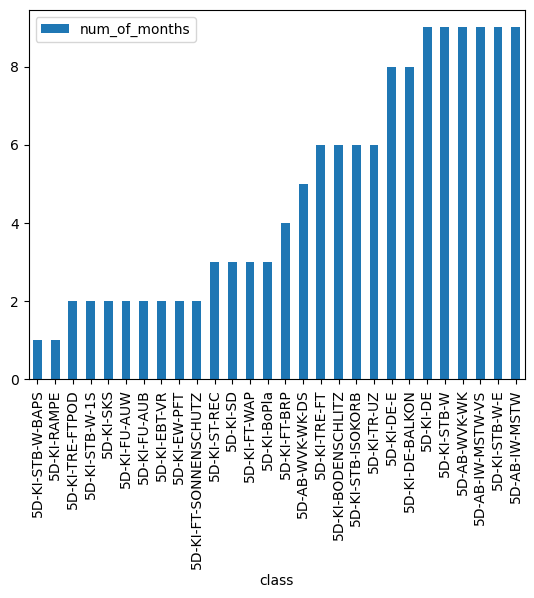

In [39]:
month_per_class.plot.bar(x = 'class', y = 'num_of_months')

In [40]:
class_per_month = merged_df \
    .groupby('dt', as_index = False) \
        .agg({'class':'nunique'}) \
            .sort_values(by = 'dt', ascending = True) \
                .rename(columns={'class':'num_of_class'})
#class_per_month

<Axes: xlabel='dt'>

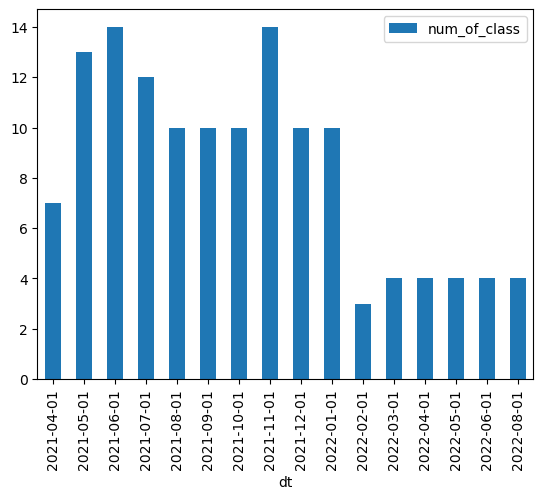

In [41]:
class_per_month.plot.bar(x = 'dt', y = 'num_of_class')

In [42]:
dt = class_per_month.dt.iloc[class_per_month.num_of_class.idxmin()]
classes_in = merged_df.loc[merged_df.dt == dt]
classes_in \
    .groupby(['name','class'], as_index = False) \
        .aggregate({'kurztext':'count'})
#merged_df['name'].loc[merged_df['class'].isin(classes_in)].unique()

,name,class,kurztext
0,"5dsf-IW-ESTW Schacht CW50/75 2GKFPl. 12,5mm 1-...",5D-AB-IW-MSTW,162
1,"5dsf-IW-ESTW Schacht CW50/75 2GKFPl. 12,5mm 1-...",5D-AB-IW-MSTW,5
2,5dsf-IW-ESTW Schacht CW50/95 3GKFPl. 15mm 1-f....,5D-AB-IW-MSTW,9
3,"5dsf-IW-ESTW Schacht CW75/100 2GKFPl. 12,5mm 1...",5D-AB-IW-MSTW,59
4,5dsf-IW-ESTW-CW100/1375mm 49dB 3GKPl. IW10a,5D-AB-IW-MSTW,2
5,"5dsf-IW-ESTW-CW50/75mm 41dB 2GKPl. 12,5mm IW08b/c",5D-AB-IW-MSTW,132
6,5dsf-IW-ESTW-CW50/875mm 49dB 3xGKPl. IW08a,5D-AB-IW-MSTW,81
7,5dsf-IW-ESTW-CW50/875mm 49dB 3xGKPl. IW11b,5D-AB-IW-MSTW,4
8,"5dsf-IW-ESTW-CW75/100mm 42dB 2GKPl. 12,5mm - IW07",5D-AB-IW-MSTW,379
9,"5dsf-IW-ESTW-CW75/100mm 42dB 2GKPl. 12,5mm - I...",5D-AB-IW-MSTW,82


In [43]:
temp = merged_df \
                .groupby('dt', as_index = False) \
                    .agg({'5d_geschoss':'nunique'})
dt1 = temp['dt'].loc[temp['5d_geschoss'].idxmin()]

In [44]:
merged_df_aug = merged_df.loc[merged_df['dt'] == dt]

In [45]:
merged_df_aug.nunique()

revitid               1235
dt                       1
kurztext                19
me                       2
ergebnis               580
name                    23
class                    3
5d_bauteil               0
5d_geschoss              5
5d_los                   3
cpi_component_type       1
volume                 290
area                   317
width                   11
thick                    0
length                 282
dtype: int64

In [46]:
# change pandas display options - set max_colwidth to None
pd.set_option('max_colwidth', None)

In [47]:
merged_df_aug \
    .groupby(['class','kurztext', 'me'], as_index = False) \
        .agg({'ergebnis':'sum'}) \
            .sort_values(by = ['class', 'kurztext'])

,class,kurztext,me,ergebnis
0,5D-AB-IW-MSTW,Az. MSTW f. U-Aussteifungsprofil 2/50mm (UA Profile),m,158.656
1,5D-AB-IW-MSTW,Az. MSTW f. U-Aussteifungsprofil 2/75mm (UA Profile),m,523.940
2,5D-AB-IW-MSTW,Blechstreifen für Hängekästen lief+vers. (H=20cm),m,39.062
3,5D-AB-IW-MSTW,"ESTW CW100/138mm 3GKPl. 12,5mm b. 3,2m",m²,3.108
4,5D-AB-IW-MSTW,"ESTW CW50/75mm 41dB 2GKPl. 12,5mm b. 3,2m",m²,129.961
5,5D-AB-IW-MSTW,"ESTW CW50/88mm 3GKPl. 12,5mm b. 3,2m",m²,161.171
6,5D-AB-IW-MSTW,"ESTW CW75/100mm 42dB 2GKPl. 12,5mm b. 3,2m",m²,501.947
7,5D-AB-IW-MSTW,"ESTW CW75/113mm 49dB 3GKPl. 12,5mm b. 3,2m",m²,253.237
8,5D-AB-IW-MSTW,"ESTW Schacht CW50/75 2GKF 12,5mm 1-f.EI30 75mm",m²,127.650
9,5D-AB-IW-MSTW,"ESTW Schacht CW50/95 2GKF 15mm + 1 GKB 12,5 92,5mm",m²,42.969


In [48]:
merged_df_aug \
    .groupby('class', as_index = False) \
        .agg({'me':'nunique'})

,class,me
0,5D-AB-IW-MSTW,2
1,5D-AB-IW-MSTW-VS,2
2,5D-AB-WVK-WK,1


In [49]:
merged_df_aug.loc[merged_df_aug['class']=='5D-AB-WVK-WK'].nunique()

revitid               72
dt                     1
kurztext               1
me                     1
ergebnis              36
name                   1
class                  1
5d_bauteil             0
5d_geschoss            5
5d_los                 2
cpi_component_type     1
volume                10
area                  17
width                  1
thick                  0
length                18
dtype: int64

In [50]:
merged_df_aug.loc[(merged_df_aug['class']=='5D-AB-IW-MSTW-VS')&(merged_df_aug['me']=='m²')].head(4)

,revitid,dt,kurztext,me,ergebnis,name,class,5d_bauteil,5d_geschoss,5d_los,cpi_component_type,volume,area,width,thick,length
4014,3342520,2022-02-01,"Vorsatzschale MW50 GKPl. 12,5mm bis 12cm",m²,0.765,"5dsf-IW-Vorsatzschale MW50 1GKPl. 12,5mm IW01",5D-AB-IW-MSTW-VS,NaN,OG01,W04,Wall,0.478,7.653,0.063,NaN,3.005
4016,3342640,2022-02-01,"Vorsatzschale MW50 GKPl. 12,5mm bis 12cm",m²,0.888,"5dsf-IW-Vorsatzschale MW50 1GKPl. 12,5mm IW01",5D-AB-IW-MSTW-VS,NaN,OG01,W04,Wall,0.555,8.884,0.063,NaN,3.443
4018,3343533,2022-02-01,Freist. Vorsatzschale CW75 GKPl. 2x12.5mm,m²,0.453,"5dsf-IW-Freist. Vorsatzschale CW75 2GKPl. 12,5mm VS05",5D-AB-IW-MSTW-VS,NaN,OG01,W04,Wall,0.453,4.529,0.100,NaN,1.830
4024,3343610,2022-02-01,"Freist. Vorsatzschale CW75 GKPl. 12,5mm",m²,0.965,"5dsf-IW-Freist. Vorsatzschale CW75 1GKPl. 12,5mm VS06",5D-AB-IW-MSTW-VS,NaN,OG01,W04,Wall,0.844,9.646,0.088,NaN,3.650


In [51]:
to_A = merged_df \
    .groupby(['kurztext', 'dt'], as_index = False) \
        .aggregate({'ergebnis':'sum'}) \
            .sort_values(by = ['dt'])
to_A.dt.unique()

array(['2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
       '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
       '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
       '2022-04-01', '2022-05-01', '2022-06-01', '2022-08-01'],
      dtype=object)

### Here I try to check the idea with system of liniar equesions. Try to calculate the prices of each elements in the project.
*Important -* here we have to accept that the price is the same for the element on 1st and n-th floor.

In [52]:
# create matrix A - coefficients of the equesion system
def make_matrix(df):
    x = to_A.kurztext.unique()
    months = to_A.dt.unique()
    n = len(months) #number of rows = number of months of the project
    m = len(x) #number of columns = number of unique elemints in te project(based on kurztext)
    A = np.zeros((n, m), dtype=float)
    k = 0
    for i in months:
        l = 0
        for j in x:
            t = df.loc[(df.dt == i) & (df.kurztext == j)]
            if t.shape[0]==1:
                A[k][l] = t.ergebnis
            l = l + 1
        k = k + 1
    print(str(n)+' '+str(m))
    return A

In [53]:
A = make_matrix(to_A) # this is the matrix of coeffiicients. There are amount of each elements per month. One row - one month.

16 60


In [54]:
matrix_rank(A)

16

### Take costs per month from KST

In [55]:
KST_df.head()

,konto,text,belegnummer,kr_db,betrag,menge,me,date
0,11100,LÖHNE,0003LL,NaN,6554.26,0.0,NaN,2021-03-01
1,11100,LÖHNE,0003LL,NaN,335.91,0.0,NaN,2021-03-01
2,11100,LÖHNE,0004LL,NaN,11007.66,0.0,NaN,2021-04-01
3,11100,LÖHNE,0004LL,NaN,638.18,0.0,NaN,2021-04-01
4,11100,LÖHNE,0005LL,NaN,12048.99,0.0,NaN,2021-05-01


In [56]:
tt = KST_df \
    .groupby(by = ['date'], as_index = False) \
        .aggregate({'betrag':'sum'})

In [57]:
b_df = tt.loc[tt.date.isin(to_A.dt.unique())]

In [58]:
b = np.array(b_df.betrag)

[1490579.83 1774492.81 1503885.05 1108559.35 1023591.2   934835.11
 2641804.23 1807786.25 2325887.56 1100919.42 1304954.64 1874119.78
 1785791.38 1436107.91 2069658.69 1379311.44]


<Axes: >

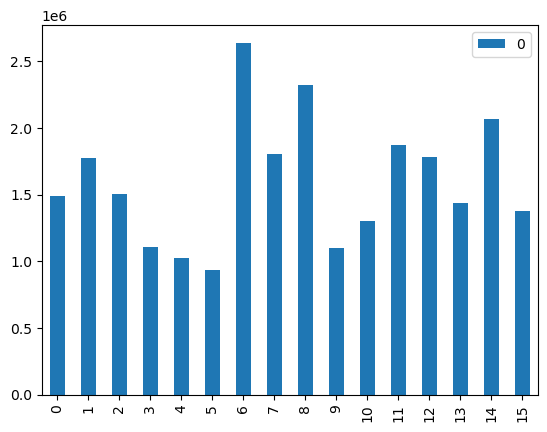

In [59]:
print(b)
BBB = pd.DataFrame(b)
BBB.plot.bar()

### Make a table of correspondence of variables with the name of components
### We make it and write into the file

In [60]:
x = to_A.kurztext.unique()

In [61]:
#dictionary
dict_components = {'x_' + str(a): x[a] for a in range(len(x))}

In [62]:
#convert from dictionary to pandas DF
df_components = pd.DataFrame([dict_components.values()], columns=dict_components.keys())
df_components

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59
0,Schalung Fundamentplatte,Sauberkeitsschicht C16/20,Beton Fundamentplatte C25/30 im Gefälle,Az für Flügelglätten Fundamentplatte,Az Rinnenausbildung,Az Pumpensumpf,Schalung Pfahlrost,Beton Pfahlrost,"Beton D/Kragpl.b.25cm C25/30 H.3,2m","Beton Stützen (Säulen oder Pfeiler) C25/30 H.3,2m",...,Schalung Beton Brüstung/Schürze,"ESTW CW75/125mm 49dB 4GKPl. 12,5mm b. 3,2m",Az. f. GKPl. Deckenschürze ü. 20 - 50cm,"ESTW CW100/125mm 43dB 2GKPl. 12,5mm b. 3,2m","ESTW CW100/150mm 49dB 4GKPl. 12,5mm b. 3,2m","Freist. Vorsatzschale CW100 GKPl. 12,5mm","ESTW CW50/100mm 48dB 4GKPl. 12,5mm b. 3,2m","Abgh. Decke+Stbl.-Rost GKPI. 12,5mm bis 50cm",Az. f. GKPl. Deckenschürze b. 20cm,"DSTW CW75+75/220mm 60dB 5GKF 12,5mm EI90 b. 3,2m"


In [63]:
# write pandas df to .csv file
df_components.to_csv('Data/Schöpfleuthnergasse/Prepared data for SLE/correspondence_table.csv', index = False)

### Make pandas DF with matrix of coefficients of the SLE
### Write it into the file

In [64]:
indexes = [str(i) for i in range(len(dict_components))]

In [65]:
A_df = pd.DataFrame(A, columns = indexes)

In [66]:
A_df.to_csv('Data/Schöpfleuthnergasse/Prepared data for SLE/coefficient_table.csv', index = False)

### Make pandas DF with vector of results - vector B
### Write it into the file together with labels

In [67]:
b_df = pd.DataFrame(b, to_A.dt.unique(), columns = ['amount'])

In [68]:
b_df.to_csv('Data/Schöpfleuthnergasse/Prepared data for SLE/constant_terms_table.csv')